In [1]:
from keras.utils.data_utils import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, Bidirectional, LSTM
from keras.datasets import imdb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
max_features = 20000
maxlen = 250
batch_size = 128
epochs = 3

In [4]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(path="imdb.npz",
                                                      num_words=max_features,
                                                      skip_top=0,
                                                      maxlen=None,
                                                      seed=113,
                                                      start_char=1,
                                                      oov_char=2,
                                                      index_from=3)

17464789/17464789 [==============================] - 0s 0us/step


In [5]:
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)

In [6]:
# Створення моделі
embedding_vector_length = 32
model = Sequential()
model.add(Embedding(input_dim=max_features, output_dim=embedding_vector_length, input_length=maxlen))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(units=256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='sigmoid'))
model.summary()

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 250, 32)           640000    
                                                                 
 dropout (Dropout)           (None, 250, 32)           0         
                                                                 
 bidirectional (Bidirectiona  (None, 64)               16640     
 l)                                                              
                                                                 
 dense (Dense)               (None, 256)               16640     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                        

In [8]:
history = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_split=0.2)

Epoch 1/3
157/157 [==============================] - 63s 399ms/step - loss: 0.4090 - accuracy: 0.8195 - val_loss: 0.2947 - val_accuracy: 0.8816
Epoch 2/3
157/157 [==============================] - 61s 388ms/step - loss: 0.1938 - accuracy: 0.9271 - val_loss: 0.3019 - val_accuracy: 0.8728
Epoch 3/3
157/157 [==============================] - 60s 385ms/step - loss: 0.1317 - accuracy: 0.9550 - val_loss: 0.3271 - val_accuracy: 0.8712


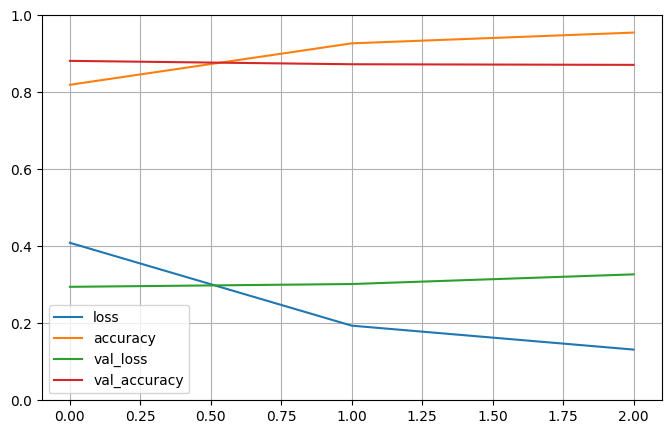

In [9]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [10]:
predictions = model.predict(X_test)

binary_predictions = ['positive' if pred > 0.5 else 'negative' for pred in predictions]

for i in range(10):
    print(f"Predicted: {binary_predictions[i]}, Label: {'positive' if y_test[i] > 0.5 else 'negative'}")

test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

782/782 [==============================] - 38s 47ms/step
Predicted: negative, Label: negative
Predicted: positive, Label: positive
Predicted: positive, Label: positive
Predicted: positive, Label: negative
Predicted: positive, Label: positive
Predicted: positive, Label: positive
Predicted: positive, Label: positive
Predicted: negative, Label: negative
Predicted: positive, Label: negative
Predicted: positive, Label: positive
782/782 [==============================] - 37s 47ms/step - loss: 0.3542 - accuracy: 0.8618
Test Loss: 0.35416316986083984
Test Accuracy: 0.861840009689331
